### Image visualization

This notebook is to examine some of the images that are created during the augmentation.

The input images are 512x512 grayscale images of nodes and the output are (as the `shape` may suggest) 32x32 gray scale images, which have undergone a rotation and mirroring process. 

In [1]:
from os import path
import tensorflow as tf

from src.utils import decode_image_record

processed = path.join('data', 'processed')
record_path = path.join(processed, 'train.tfrecord')

features = { 
    'image': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([2], tf.int64)
}
shape = (32, 32, 1)

def decoder(example):
    feature = tf.io.parse_single_example(example, features)
    image = tf.io.parse_tensor(feature['image'], tf.float32)
    image.set_shape(shape)
    # We only want the 'label_idx'. Not the 'angle'.
    label = feature['label'][0]

    return [image, label]

dataset = tf.data.TFRecordDataset(record_path)
dataset2=decode_image_record(path.join(processed, 'train.tfrecord'), decoder)

example_iterator = dataset.map(decoder).take(10)

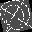

2

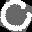

1

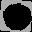

1

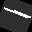

0

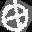

2

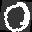

1

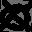

2

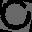

1

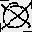

2

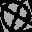

2

In [2]:
from IPython.display import display
from PIL import Image

for image, label in example_iterator:
    img = tf.image.convert_image_dtype(image, tf.uint8)
    size = list(img.shape[:-1])
    display(Image.frombytes(mode='L', data=img.numpy(), size=size))
    display(label.numpy())

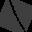

2

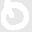

2

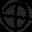

2

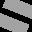

2

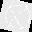

2

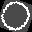

2

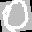

2

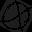

2

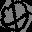

2

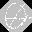

2

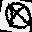

2

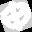

2

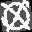

2

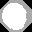

2

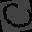

2

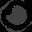

2

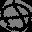

2

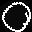

2

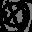

2

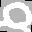

2

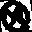

2

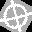

2

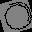

2

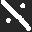

2

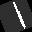

2

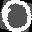

2

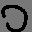

2

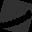

2

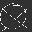

2

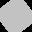

2

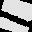

2

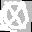

2

In [3]:
for tensor in iter(dataset2).next()[0]:
    img = tf.image.convert_image_dtype(tensor, tf.uint8)
    size = list(img.shape[:-1])
    display(Image.frombytes(mode='L', data=img.numpy(), size=size))